# **Carlos Gross-Martinez**

#**Assignmnet 3 - Ridge-Penalized Logistic Regression**

#**CAP6640 - Computational Foundations of AI**

***Importing libraries to use in the program and importing the information from the excel sheet to create a data frame for data manipulation and processing. Then printing the dataframe to verify information.***

In [ ]:
import pandas as pd
import numpy as np

data_import = pd.read_csv("TrainingData_N183_p10.csv")
updated_data_import = data_import.replace({'Ancestry':{'African': 0, 'European': 1, 'EastAsian': 2, 'Oceanian': 3, 'NativeAmerican': 4}})

print(type(updated_data_import))
updated_data_import

<class 'pandas.core.frame.DataFrame'>


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,0
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,0
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,0
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274,0
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274,0
...,...,...,...,...,...,...,...,...,...,...,...
178,4.562678,1.595991,-6.255160,-3.083079,0.155693,-2.509439,-1.186470,0.641546,2.893239,0.885596,4
179,4.559052,1.581629,-5.121037,-4.312312,0.021703,-0.787173,-1.838054,-0.118590,1.200644,0.885596,4
180,3.101335,1.477101,-5.759153,-2.083745,-0.750615,1.061579,-1.341655,-0.215556,-0.133415,0.885596,4
181,3.235086,-0.974829,-4.049595,0.020907,-0.489322,0.627622,0.087942,0.737715,3.262126,0.885596,4


***Splitting dataset into features and output.***

In [ ]:
data_set = updated_data_import.to_numpy()

y = data_set[:, -1]
features = features = data_set[:, 0:10]

print(type(y))
print(y.shape)
print(y)
print(type(features))
print(features.shape)
print(features)

<class 'numpy.ndarray'>
(183,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
<class 'numpy.ndarray'>
(183, 10)
[[-10.90117144   0.79874334  -1.14330096 ...   1.51995913  -2.21429419
   -0.67127393]
 [ -9.9900543    1.41682135  -0.72962611 ...  -4.63774582   3.35162878
   -0.67127393]
 [ -9.34538844   2.9130536   -0.92142078 ...  -1.45109601   0.44418286
   -0.67127393]
 ...
 [  3.10133459   1.47710101  -5.75915251 ...  -0.21555616  -0.13341531
    0.88559632]
 [  3.23508603  -0.97482

***normalizing and standirizing features***

In [ ]:
X = []

for feature in range(features.shape[1]):

  X.append(np.divide(np.subtract(features[:, feature], np.mean(features[:, feature])), np.std(features[:, feature])))

X = np.asarray(X)
X = X.T
X = np.insert(X, 0, 1, axis=1)

print(type(X))
print(X.shape)
print(X)

<class 'numpy.ndarray'>
(183, 11)
[[ 1.         -2.51178313 -0.35212827 ...  1.13419452 -1.46589031
  -0.64433144]
 [ 1.         -2.32581538 -0.17434339 ... -2.96026447  2.05370465
  -0.64433144]
 [ 1.         -2.1942329   0.25603507 ... -0.84135701  0.21518981
  -0.64433144]
 ...
 [ 1.          0.34626271 -0.15700446 ... -0.01980624 -0.15005269
   0.94908279]
 [ 1.          0.37356266 -0.8622813  ...  0.61405509  1.99710784
   0.94908279]
 [ 1.          0.72820876 -0.03512249 ... -0.12253783  0.74685082
   2.54249703]]


***Preparing results dataset for logistic regression***

In [ ]:
Y = np.empty([183, 5])

for x in range(len(y)):
  if y[x] == 0:
    Y[x] = [1,0,0,0,0]
  if y[x] == 1:
    Y[x] = [0,1,0,0,0]
  if y[x] == 2:
    Y[x] = [0,0,1,0,0]
  if y[x] == 3:
    Y[x] = [0,0,0,1,0]
  if y[x] == 4:
    Y[x] = [0,0,0,0,1]

print(type(Y))
print(Y.shape)
#print(Y)

<class 'numpy.ndarray'>
(183, 5)


***Conducting ridge-penalized logistic regression with using different tunning parameters in order to understand how the tunning parameters affect the result of the Beta values that determines the predictability of future samples. Finally, the results are printed for analysis.***

In [ ]:
beta = []

alpha = 10**-5
lambdas = [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

for lamb in (lambdas):

  B_temp = np.zeros((11, 5))
  Z = B_temp
  P = np.zeros((183,5))

  for i in range(0, 10**4):

    U = np.exp(np.matmul(X,B_temp))

    for y in range(len(U)):
      P[y] = np.divide(U[y], np.sum(U[y]))

    Z[0] = B_temp[0]

    B_temp = np.add(B_temp, np.multiply(alpha, (np.subtract(np.matmul(X.T, np.subtract(Y, P)), (np.multiply(2 * lamb, np.subtract(B_temp, Z)))))))
    #print('Lambda is:', lamb)
    #print('Iteration: ', i)
    #print(B_temp)

  beta.append(B_temp)

beta = np.array(beta)

print(beta.shape)
print(beta)

(9, 11, 5)
[[[-2.53211141e-01 -1.64592621e-02  5.70897986e-01 -2.37292907e-01
   -6.39346756e-02]
  [-1.46167078e+00  8.17535430e-02  7.28210978e-01  1.09135735e-01
    5.42570522e-01]
  [ 1.12949781e-01 -1.51415443e+00  7.46190689e-01  7.12343871e-01
   -5.73299060e-02]
  [-2.24320546e-01  3.21075631e-01 -6.53248617e-02  1.11988519e+00
   -1.15131542e+00]
  [-3.46628210e-02 -7.65388547e-02  1.71159810e+00 -7.51156177e-01
   -8.49240250e-01]
  [ 1.61688933e-01 -1.06477151e-01 -9.92245352e-02  3.17805287e-02
    1.22322249e-02]
  [-8.48775856e-02  4.47867395e-01 -1.77127448e-01  2.99815816e-02
   -2.15843944e-01]
  [-1.26089352e-01  1.50556537e-01  2.50738752e-02 -3.56368103e-02
   -1.39042504e-02]
  [ 6.13602910e-02 -4.01993333e-01  7.08343790e-02 -5.64093539e-03
    2.75439599e-01]
  [ 1.75309994e-01 -2.58536182e-01  2.52514701e-02 -1.50970236e-01
    2.08944953e-01]
  [-8.90629450e-02 -3.98141709e-03 -2.41267685e-01 -1.11903801e-01
    4.46215847e-01]]

 [[-2.53217838e-01 -1.64584889

# ***Deliverable 1***

***Plotting the results of the different beta values for each feature in the dataset against the tunning parameters. From the graph it can be observed that as the tuning parameters increase in value, the Beta values of the model approach “0”. Hence, the smaller the value of the tunning parameter, the less restricted the values of the Betas and the higher the value of the tunning parameter, the more restricted the values of the Betas.***

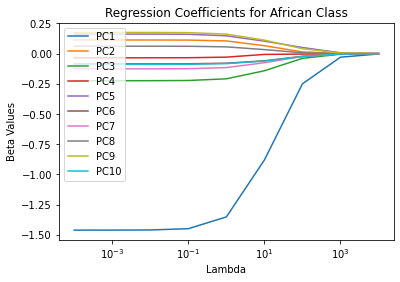

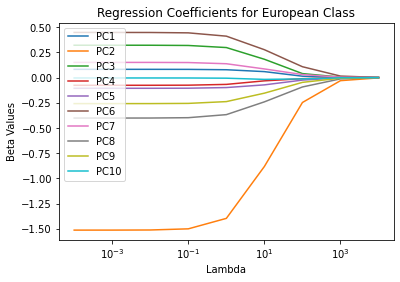

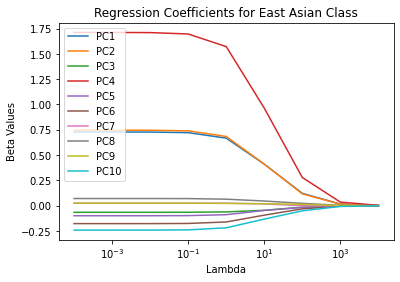

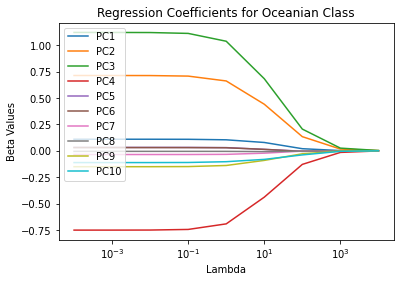

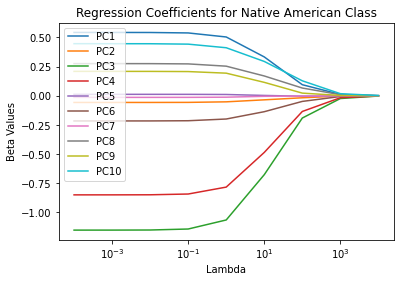

In [ ]:
import matplotlib.pyplot as plt

data_class = ['African', 'European', 'East Asian', 'Oceanian', 'Native American']

x = np.array(lambdas)

for a in range(0, 5):
  fig, ax = plt.subplots()
  plt.xscale('log')
  ax.plot(x, beta[:, 1, a], label="PC1")
  ax.plot(x, beta[:, 2, a], label="PC2")
  ax.plot(x, beta[:, 3, a], label="PC3")
  ax.plot(x, beta[:, 4, a], label="PC4")
  ax.plot(x, beta[:, 5, a], label="PC5")
  ax.plot(x, beta[:, 6, a], label="PC6")
  ax.plot(x, beta[:, 7, a], label="PC7")
  ax.plot(x, beta[:, 8, a], label="PC8")
  ax.plot(x, beta[:, 9, a], label="PC9")
  ax.plot(x, beta[:, 10, a], label="PC10")
  ax.legend(loc = 'upper left')
  plt.title("Regression Coefficients for " +  data_class[a] + " Class")
  plt.xlabel("Lambda")
  plt.ylabel("Beta Values")
  plt.show()

***Defining a function that will split a dataset into folds. Function will take dataset as parameter, then shuffle the dataset and complete a 20-80 split. 20% for testing, and 80% for training. Function will also update the labels of the samples for logistic regression as well as centering and standarizing the features. Function will return 4 datasets for training and testing ***

In [ ]:
def fold_data_set(data_set):

  data_temp = data_set.to_numpy()
  np.random.shuffle(data_temp)
  slice_index = int(len(data_temp) / 5)

  y = data_temp[:, -1]
  y_val = y[0 : slice_index]
  y_train = y[slice_index : len(y)]

  Y_val = np.empty([slice_index, 5])
  Y_train = np.empty([len(y) - slice_index, 5])

  for x in range(len(y_val)):
    if y_val[x] == 0:
      Y_val[x] = [1,0,0,0,0]
    if y_val[x] == 1:
      Y_val[x] = [0,1,0,0,0]
    if y_val[x] == 2:
      Y_val[x] = [0,0,1,0,0]
    if y_val[x] == 3:
      Y_val[x] = [0,0,0,1,0]
    if y_val[x] == 4:
      Y_val[x] = [0,0,0,0,1]

  for x in range(len(y_train)):
    if y_train[x] == 0:
      Y_train[x] = [1,0,0,0,0]
    if y_train[x] == 1:
      Y_train[x] = [0,1,0,0,0]
    if y_train[x] == 2:
      Y_train[x] = [0,0,1,0,0]
    if y_train[x] == 3:
      Y_train[x] = [0,0,0,1,0]
    if y_train[x] == 4:
      Y_train[x] = [0,0,0,0,1]

  features = data_temp[:, 0:10]
  x_val = features[0: slice_index, :]
  x_train = features[slice_index:len(features), :]

  X_val = []
  X_train = []

  for feature in range(x_val.shape[1]):

    X_val.append(np.divide(np.subtract(x_val[:, feature], np.mean(x_train[:, feature])), np.std(x_train[:, feature])))

  X_val = np.asarray(X_val)
  X_val = X_val.T
  X_val = np.insert(X_val, 0, 1, axis=1)

  for feature in range(x_train.shape[1]):

    X_train.append(np.divide(np.subtract(x_train[:, feature], np.mean(x_train[:, feature])), np.std(x_train[:, feature])))

  X_train = np.asarray(X_train)
  X_train = X_train.T
  X_train = np.insert(X_train, 0, 1, axis=1)

  return Y_val, Y_train, X_val, X_train

***Defining a function that will conduct logistic regression in the training dataset. It will loop through different tunning parameters and return the beta values for all tunning parameters in an array.***

In [ ]:
def log_reg_fit(X_train, Y_train):

  beta = []

  alpha = 10**-5
  lambdas = [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

  for lamb in (lambdas):

    B_temp = np.zeros((11, 5))
    Z = B_temp
    P = np.zeros((len(X_train),5))

    for i in range(0, 10**4):

      U = np.exp(np.matmul(X_train,B_temp))

      for y in range(len(U)):
        P[y] = np.divide(U[y], np.sum(U[y]))

      Z[0] = B_temp[0]

      B_temp = np.add(B_temp, np.multiply(alpha, (np.subtract(np.matmul(X_train.T, np.subtract(Y_train, P)), (np.multiply(2 * lamb, np.subtract(B_temp, Z)))))))

    beta.append(B_temp)

  beta = np.array(beta)

  return beta

***Defining a function that will calculate the Categorical Cross Entropy for each fold in the data set per tunning parameter and return and array with all the CCE calculations. The CCE calculations were conducted with the validation dataset of the current fold.***

In [ ]:
def log_reg_CCE(betas, X_val, Y_val):

  CCE = []

  for i in range(0, 9):

    P = np.zeros((len(X_val), 5))

    U = np.exp(np.matmul(X_val,betas[i, :, :]))

    for y in range(len(U)):
      P[y] = np.divide(U[y], np.sum(U[y]))

    temp = np.log10(P)

    temp_2 = np.multiply(Y_val, temp)

    temp_3 = temp_2.sum()

    temp_4 = -temp_3 / len(Y_val)

    CCE.append(temp_4)

  return CCE

***Code that runs through all 5 folds in the dataset. It will call all functions to split the dataset by fold, further split the folded dataset into training and test matrices with features normalized and output centered. It calls for the logistic regression function to calculate all Betas based on all tunning parameters, and it calculates the CCE for each of the folds. Then it saves all the information into an array. Finally, it prints the information to the screen for analysis.***

In [ ]:
folds = 5
model_CCE = []

for b in range(0, folds):

  Y_val, Y_train, X_val, X_train = fold_data_set(updated_data_import)

  beta_fitted = log_reg_fit(X_train, Y_train)

  model_CCE.append(log_reg_CCE(beta_fitted, X_val, Y_val))

model_CCE = np.array(model_CCE)

print(type(model_CCE))
print(model_CCE.shape)
print(model_CCE)

<class 'numpy.ndarray'>
(5, 9)
[[0.05119043 0.05120001 0.05129579 0.05225691 0.06214562 0.15813814
  0.48243187 0.65618435 0.67967234]
 [0.0384278  0.03843649 0.03852343 0.0393965  0.04843862 0.14060584
  0.47385206 0.64831577 0.67160125]
 [0.06220869 0.06221967 0.06232949 0.06342993 0.07460031 0.1756336
  0.48559307 0.64425317 0.66552564]
 [0.0465302  0.04653955 0.04663305 0.04757122 0.05721624 0.15151123
  0.47277101 0.64089501 0.66347465]
 [0.03976    0.03976905 0.03985958 0.04076826 0.05013685 0.14228148
  0.45615874 0.61896494 0.64069408]]


***Code that calculates the cross-validation error of all folds by computing the mean of the CCE for all folds. The results are printed and saved into an array.***

In [ ]:
CV = []

for x in range(model_CCE.shape[1]):

  CV.append((model_CCE[:, x].sum()) / 5)

CV = np.array(CV)

print(type(CV))
print(CV.shape)
print(CV)

<class 'numpy.ndarray'>
(9,)
[0.04762342 0.04763295 0.04772827 0.04868457 0.05850753 0.15363406
 0.47416135 0.64172265 0.66419359]


# ***Deliverable 2***

***Plotting the CV error of for the model based on the tunning parameter value. From the graph it can be observed, that as the tunning parameter grows larger, so does the CV error of the logistic regression model.***

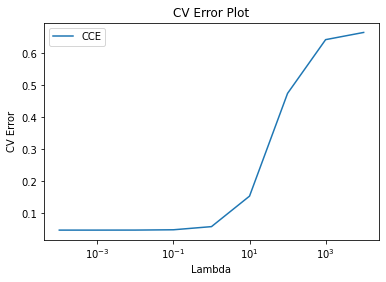

In [ ]:
lambdas = [10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]

x = np.array(lambdas)

fig, ax = plt.subplots()
plt.xscale('log')
ax.plot(x, CV, label="CCE")
ax.legend(loc = 'upper left')
plt.title("CV Error Plot")
plt.xlabel("Lambda")
plt.ylabel("CV Error")
plt.show()

# ***Deliverable 3***
***Printing to screen lowest CV error and Lambda that provided lowest CV error***

In [ ]:
CV_temp = np.array(CV)
lowest_Lambda = x

lowest_CV = np.amin(CV_temp)
lowest_CV_index = np.where(CV == lowest_CV)

print('Crosss Validation errors:')
print(CV_temp)

print('Lowest CV error:')
print(CV_temp[lowest_CV_index])

print('Lambda producing lowest CV error:')
print(lowest_Lambda[lowest_CV_index])

Crosss Validation errors:
[0.04762342 0.04763295 0.04772827 0.04868457 0.05850753 0.15363406
 0.47416135 0.64172265 0.66419359]
Lowest CV error:
[0.04762342]
Lambda producing lowest CV error:
[0.0001]


#***Deliverable 4***
***Retraining model with full test dataset and optimal lambda, and then testing with the test dataset***

In [ ]:
y = data_set[:, -1]
features = features = data_set[:, 0:10]

print(type(y))
print(y.shape)
print(y)
print(type(features))
print(features.shape)
print(features)

<class 'numpy.ndarray'>
(183,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
<class 'numpy.ndarray'>
(183, 10)
[[-10.90117144   0.79874334  -1.14330096 ...   1.51995913  -2.21429419
   -0.67127393]
 [ -9.9900543    1.41682135  -0.72962611 ...  -4.63774582   3.35162878
   -0.67127393]
 [ -9.34538844   2.9130536   -0.92142078 ...  -1.45109601   0.44418286
   -0.67127393]
 ...
 [  3.10133459   1.47710101  -5.75915251 ...  -0.21555616  -0.13341531
    0.88559632]
 [  3.23508603  -0.97482

In [ ]:
X = []

for feature in range(features.shape[1]):

  X.append(np.divide(np.subtract(features[:, feature], np.mean(features[:, feature])), np.std(features[:, feature])))

X = np.asarray(X)
X = X.T
X = np.insert(X, 0, 1, axis=1)

print(type(X))
print(X.shape)
print(X)

<class 'numpy.ndarray'>
(183, 11)
[[ 1.         -2.51178313 -0.35212827 ...  1.13419452 -1.46589031
  -0.64433144]
 [ 1.         -2.32581538 -0.17434339 ... -2.96026447  2.05370465
  -0.64433144]
 [ 1.         -2.1942329   0.25603507 ... -0.84135701  0.21518981
  -0.64433144]
 ...
 [ 1.          0.34626271 -0.15700446 ... -0.01980624 -0.15005269
   0.94908279]
 [ 1.          0.37356266 -0.8622813  ...  0.61405509  1.99710784
   0.94908279]
 [ 1.          0.72820876 -0.03512249 ... -0.12253783  0.74685082
   2.54249703]]


In [ ]:
Y = np.empty([183, 5])

for x in range(len(y)):
  if y[x] == 0:
    Y[x] = [1,0,0,0,0]
  if y[x] == 1:
    Y[x] = [0,1,0,0,0]
  if y[x] == 2:
    Y[x] = [0,0,1,0,0]
  if y[x] == 3:
    Y[x] = [0,0,0,1,0]
  if y[x] == 4:
    Y[x] = [0,0,0,0,1]

print(type(Y))
print(Y.shape)
#print(Y)

<class 'numpy.ndarray'>
(183, 5)


In [ ]:
test_beta = []

alpha = 10**-5
lambdas = lowest_Lambda[lowest_CV_index]

B_temp = np.zeros((11, 5))
Z = B_temp
P = np.zeros((183,5))

for i in range(0, 10**4):

  U = np.exp(np.matmul(X,B_temp))

  for y in range(len(U)):
    P[y] = np.divide(U[y], np.sum(U[y]))

  Z[0] = B_temp[0]

  B_temp = np.add(B_temp, np.multiply(alpha, (np.subtract(np.matmul(X.T, np.subtract(Y, P)), (np.multiply(2 * lamb, np.subtract(B_temp, Z)))))))
    #print('Lambda is:', lamb)
    #print('Iteration: ', i)
    #print(B_temp)

test_beta.append(B_temp)

test_beta = np.array(test_beta)

print(test_beta.shape)
print(test_beta)

(1, 11, 5)
[[[-3.14023409e-01  2.84320791e-02  5.57789066e-01 -2.44837192e-01
   -2.73605436e-02]
  [-3.00272882e-03  9.67182482e-05  1.59334141e-03  1.68706498e-04
    1.14396266e-03]
  [ 1.47947645e-04 -3.13201325e-03  1.60813607e-03  1.64633290e-03
   -2.70403365e-04]
  [-4.37070074e-04  4.57405923e-04 -1.37185794e-04  2.53819250e-03
   -2.42134256e-03]
  [-1.03155115e-04 -2.10973282e-04  3.63832189e-03 -1.59724203e-03
   -1.72695147e-03]
  [ 6.99210645e-04 -2.91833332e-04 -2.61252749e-04 -5.99202577e-05
   -8.62043057e-05]
  [-2.86453580e-04  1.51783233e-03 -4.64066822e-04 -1.10113133e-04
   -6.57198795e-04]
  [-2.60673665e-04  3.93184862e-04 -5.01989035e-05 -3.47834618e-05
   -4.75288319e-05]
  [ 5.37313036e-05 -1.33487486e-03  3.74579499e-04 -4.83218418e-05
    9.54885901e-04]
  [ 5.21187412e-04 -6.22071375e-04  2.01794478e-04 -3.66788674e-04
    2.65878159e-04]
  [-3.26641639e-04 -2.02997186e-04 -7.66640100e-04 -5.49459929e-04
    1.84573885e-03]]]


In [ ]:
test_data_import = pd.read_csv("TestData_N111_p10.csv")

print(type(test_data_import))
test_data_import

<class 'pandas.core.frame.DataFrame'>


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,Unknown
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,Unknown
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,Unknown
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274,Unknown
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
106,-11.030349,1.712786,-1.392893,-0.163989,3.623641,-0.263645,-3.337796,2.279226,-2.632659,-0.671274,AfricanAmerican
107,-7.994173,0.045333,-0.738547,0.189793,-2.545140,-0.332066,0.026289,-1.840944,-0.456438,-0.671274,AfricanAmerican
108,-8.874531,2.074620,-2.060999,-0.898143,-1.372896,-3.175091,2.325163,-1.256258,-0.133253,-0.671274,AfricanAmerican
109,-7.017063,-0.199721,-1.469538,-1.997714,1.892038,-1.880466,-3.278863,-0.336890,0.042410,-0.671274,AfricanAmerican


In [ ]:
test_data_set = test_data_import.to_numpy()

test_y = test_data_set[:, -1]
test_features = test_data_set[:, 0:10]

print(type(test_y))
print(test_y.shape)
print(test_y)
print(type(test_features))
print(test_features.shape)
print(test_features)

<class 'numpy.ndarray'>
(111,)
['Unknown' 'Unknown' 'Unknown' 'Unknown' 'Unknown' 'Mexican' 'Mexican'
 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican'
 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican'
 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican'
 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican'
 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican'
 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican'
 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican' 'Mexican'
 'Mexican' 'Mexican' 'Mexican' 'AfricanAmerican' 'AfricanAmerican'
 'AfricanAmerican' 'AfricanAmerican' 'AfricanAmerican' 'AfricanAmerican'
 'AfricanAmerican' 'AfricanAmerican' 'AfricanAmerican' 'AfricanAmerican'
 'AfricanAmerican' 'AfricanAmerican' 'AfricanAmerican' 'AfricanAmerican'
 'AfricanAmerican' 'AfricanAmerican' 'AfricanAmerican' 'AfricanAmerican'
 'AfricanAmerican' 'AfricanAmerican' 'Afri

In [ ]:
test_X = []

for feature in range(test_features.shape[1]):

  test_X.append(np.divide(np.subtract(test_features[:, feature], np.mean(test_features[:, feature])), np.std(test_features[:, feature])))

test_X = np.asarray(test_X)
test_X = test_X.T
test_X = np.insert(test_X, 0, 1, axis=1)

print(type(test_X))
print(test_X.shape)
print(test_X)

<class 'numpy.ndarray'>
(111, 11)
[[1 0.8699018398314436 3.0355853820158702 ... 0.027454934383214554
  1.7620772006776242 -0.7268155677785246]
 [1 1.4958855964335807 0.542915240678762 ... 1.04836589660804
  -0.5571042050700141 2.261203988644299]
 [1 0.6059650757914462 -1.6768022329607548 ... -0.23099149990085105
  -1.1863889120035072 -0.7268155677785246]
 ...
 [1 -1.1336613501990704 1.1289010243593312 ... -0.4931111828240885
  0.1076058662587216 -0.7268155677785246]
 [1 -0.8069861736305044 -0.150415409410628 ... -0.0326344836496454
  0.21990147927814982 -0.7268155677785246]
 [1 -0.5380904812573646 0.19057086725553385 ... 0.26743900905563817
  0.7056424904000196 -0.7268155677785246]]


In [ ]:
test_Y = np.empty([111, 3])

for x in range(len(test_y)):
  if test_y[x] == 'Unknown':
    test_Y[x] = [1,0,0]
  if test_y[x] == 'Mexican':
    test_Y[x] = [0,1,0]
  if test_y[x] == 'AfricanAmerican':
    test_Y[x] = [0,0,1]

print(type(test_Y))
print(test_Y.shape)
#print(test_Y)

<class 'numpy.ndarray'>
(111, 3)


In [ ]:
test_U = np.zeros((len(test_X), 5))
test_P = np.zeros((len(test_X), 5))

temp = np.matmul(test_X, test_beta)

for i in range (temp.shape[2]):
  for n in range(temp.shape[1]):

    test_U[n, i] = np.exp(temp[0,n,i])

for y in range(len(test_U)):
  test_P[y] = np.divide(test_U[y], np.sum(test_U[y]))

print(type(test_P))
print(test_P.shape)
#print(test_P)

<class 'numpy.ndarray'>
(111, 5)


#***Deliverable 4 Continued***
***Printing the probability for each class to screen for each sample in test dataset***

In [ ]:
for z in range(test_P.shape[0]):
  print('Test Sample number: ', z)
  print('Probability of African: ', test_P[z, 0])
  print('Probability of European: ', test_P[z, 1])
  print('Probability of East Asian: ', test_P[z, 2])
  print('Probability of Oceanian: ', test_P[z, 3])
  print('Probability of Native American: ', test_P[z, 4])

Test Sample number:  0
Probability of African:  0.13851565758122467
Probability of European:  0.19443534787526706
Probability of East Asian:  0.3311275157591763
Probability of Oceanian:  0.1527189632856095
Probability of Native American:  0.1832025154987225
Test Sample number:  1
Probability of African:  0.13828531052991883
Probability of European:  0.19487547308214248
Probability of East Asian:  0.33056032512775513
Probability of Oceanian:  0.14833806843350464
Probability of Native American:  0.18794082282667887
Test Sample number:  2
Probability of African:  0.13812932912163733
Probability of European:  0.19713432506538855
Probability of East Asian:  0.33251686166668665
Probability of Oceanian:  0.1486413490503523
Probability of Native American:  0.18357813509593526
Test Sample number:  3
Probability of African:  0.13955435353110798
Probability of European:  0.1944596103184021
Probability of East Asian:  0.3317340446019626
Probability of Oceanian:  0.14985957880732925
Probability of 

#***Deliverable 4 Continued***
***Printing the highest class probability for each sample in test dataset***

In [ ]:
for i in range(test_P.shape[0]):
  sample_prob = np.amax(test_P[i])
  prob_index = np.where(test_P[i] == sample_prob)

  print('Test Sample number: ', i)

  if prob_index[0] == 0:
    print('This sample has the highest probability of being African')
  if prob_index[0] == 1:
    print('This sample has the highest probability of being European')
  if prob_index[0] == 2:
    print('This sample has the highest probability of being East Asian')
  if prob_index[0] == 3:
    print('This sample has the highest probability of being East Oceanian')
  if prob_index[0] == 4:
    print('This sample has the highest probability of being East Native American')

Test Sample number:  0
This sample has the highest probability of being East Asian
Test Sample number:  1
This sample has the highest probability of being East Asian
Test Sample number:  2
This sample has the highest probability of being East Asian
Test Sample number:  3
This sample has the highest probability of being East Asian
Test Sample number:  4
This sample has the highest probability of being East Asian
Test Sample number:  5
This sample has the highest probability of being East Asian
Test Sample number:  6
This sample has the highest probability of being East Asian
Test Sample number:  7
This sample has the highest probability of being East Asian
Test Sample number:  8
This sample has the highest probability of being East Asian
Test Sample number:  9
This sample has the highest probability of being East Asian
Test Sample number:  10
This sample has the highest probability of being East Asian
Test Sample number:  11
This sample has the highest probability of being East Asian
Te

#***Deliverable 5***
***There is no different between the unknow, mexican, and african american class. Based on the results, you would think that African American wil be more related to the african class and the mexican class more towards europe. Nevertheless, based on the results after training the model, all classes in the test dataset were label as east asian ***